In [1]:
import numpy as np
import math
from scipy.linalg import solve
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1 网格生成

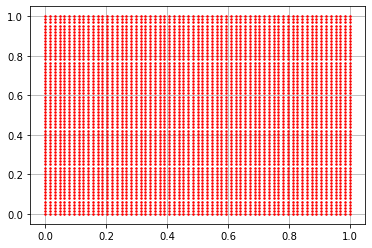

<Figure size 576x576 with 0 Axes>

In [2]:
h = 1/(2**6)    # 空间离散步长（均匀网格）
num = int(1/h)    # 网格数（格点数 = 网格数 + 1）
x_axis = np.arange(0, 1+h, h)    # X轴离散
y_axis = np.arange(0, 1+h, h)    # Y轴离散
x_pts, y_pts = np.meshgrid(x_axis, y_axis)    #利用meshgrid生成网格
plt.plot(x_pts, y_pts,
        color='red',
        marker='.',
        markersize=3,
        linestyle='',
        alpha = 1)
plt.grid(True)
plt.figure(figsize=(8,8))
plt.show()    # 查看网格格点


## 2 求解线性方程组

### 2.1 定义M矩阵和N矩阵

In [3]:
def M_matrix(n):
    M_mtr = (1/(h**2))*np.eye(n)
    M_mtr[0][0] = 0
    M_mtr[n-1][n-1] = 0
    return M_mtr

def N_matrix(m):
    N_mtr = np.eye(m)
    for i in range(1, m-1):
        N_mtr[i][i-1] = 1/(h**2)
        N_mtr[i][i+1] = 1/(h**2)
        N_mtr[i][i] = -4/(h**2)
    return N_mtr

### 2.2 组装系数矩阵

In [4]:
N = N_matrix(num+1)
M = M_matrix(num+1)
I = np.eye(num+1)
O = np.zeros(num+1)
A = np.zeros(((num+1)*(num+1),(num+1)*(num+1)))

for ii in range(0, (num+1)*(num+1), num+1):
    A[ii:ii+num+1, ii:ii+num+1] = N
for ii in range(0, (num+1)*(num+1)-(num+1), num+1):
    A[ii:ii+num+1, ii+num+1:ii+2*(num+1)] = M
    A[ii+num+1:ii+2*(num+1), ii:ii+num+1] = M

A[0:num+1, 0:num+1] = I
A[-(num+1):, -(num+1):] = I
A[0:num+1, num+1:2*(num+1)] = O
A[-(num+1):, -2*(num+1):-(num+1)] = O


### 2.3 边界条件设定及右端项矩阵组装

In [5]:
f0_pos = np.zeros((num+1, 2))    # 最左侧边界格点
fd_pos = np.zeros((num+1, 2))    # 最右侧边界格点
fi_pos = np.zeros((num-1, num+1, 2))    # 中间的所有格点

# 拾取内部格点与边界格点
for ii in range(0, num-1):
    for kk in range(1, num):
        fi_pos[ii, kk, 0] = (ii+1)*h
        fi_pos[ii, kk, 1] = (kk)*h

In [6]:
f0 = np.zeros((num+1, 1))    # f函数在最左侧格点的函数值，因为是Dirichlet边界条件，所以直接设为0
fd = np.zeros((num+1, 1))    # f函数在最右侧格点的函数值，因为是Dirichlet边界条件，所以直接设为0
fi = np.zeros((num-1, num+1))    # f函数在其余中间格点的函数值

# 利用f的表达式计算函数在中间格点的函数值，注意上下边界处已经设为0了（Dirichlet边界条件）
for ii in range(0, num-1):
    for kk in range(0, num+1):
        fi[ii, kk] = -4*(np.pi**2)*np.sin(2*np.pi*fi_pos[ii, kk, 0])*(2*np.cos(2*np.pi*fi_pos[ii, kk, 1])-1)
fi = fi.T
fi = fi.flatten('F').reshape((num-1)*(num+1),1)    # 将fi按列方向转换成一维数组
f = np.vstack((f0, fi, fd))    # 将f0, fi, fd拼装成f矩阵，此即是方程右端项

### 2.4 求解线性方程组及绘图

Text(0.5, 1.0, 'The numerical solution')

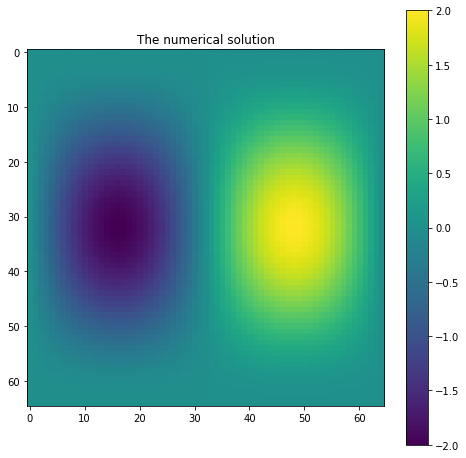

In [7]:
U = np.zeros([num+1, num+1]).reshape((num+1)*(num+1),1)    # 初始化数值解矩阵
U = solve(A,f)    # 利用scipy库求解方程
U = U.reshape(num+1,num+1).T    # 将一维的U矩阵转换成网格矩阵，以便绘图

plt.figure(figsize=(8,8))
plt.imshow(U)
plt.colorbar()
plt.title("The numerical solution")

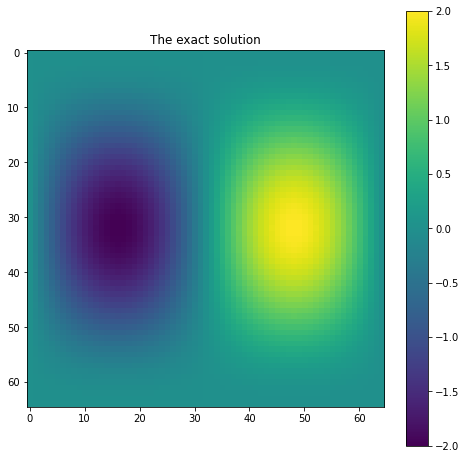

In [8]:
exact_solution = np.sin(2*np.pi*x_pts)*(np.cos(2*np.pi*y_pts)-1)    # 代入精确解的表达式

plt.figure(figsize=(8,8))
plt.title("The exact solution")
plt.imshow(exact_solution)
plt.colorbar()

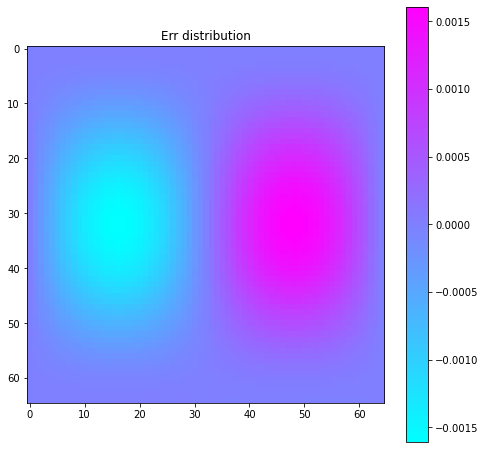

In [9]:
# 计算数值解与精确解误差
err = U - exact_solution


plt.figure(figsize=(8,8))
plt.imshow(err, cmap='cool')
plt.title("Err distribution")
plt.colorbar()

In [10]:
# 计算最大误差
err = U - exact_solution
np.array(err).max()

0.0016071553592342802

In [11]:
# 计算误差阶数
eh1 = 0.02590149344375048
eh2 = 0.0064379288801692525
eh3 = 0.0016071553592342802
eh = (eh1 - eh2)/(eh2 - eh3)
math.log2(eh)

2.010449827737343